In [69]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import cluster

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from scipy.cluster import vq

In [70]:
df = pd.read_csv('kmeansjuly.csv')

In [71]:
#convert to int
def handle_non_numerical_data(df):
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)

In [72]:
f1 = df['PRODTYPE'].values
f2 = df['LANGUAGE'].values
f3 = df['PHYSICAL'].values
f4 = df['PROMO'].values
f5 = df['TAXPROD'].values

In [73]:
X=np.array([f1,f5])

In [77]:
k = 1
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [78]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

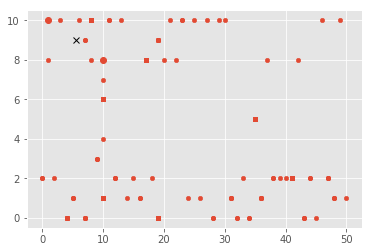

In [80]:
plt.scatter(f1,f5, s=20)
for i in range(k):
    # select only data observations with cluster label == i
    ds = X[np.where(labels==i)]
    # plot the data observations
    pyplot.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
pyplot.show()

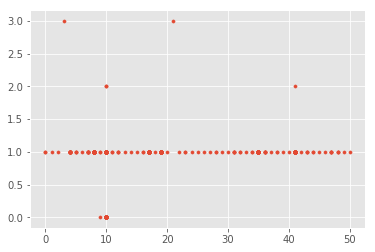